#  Conv.運作與參數生成
## - Conv.的參數設定
## - Conv.怎麼運算
## - Conv.權重如何生成
## - 權重那要用哪生成方式


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\user\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

## Conv.的參數設定
<font size=3>**範例1:bias有沒有設定的差異** </font>

| Example   | # input channel | # output channel | kernel sizse | bias   |
| :-----:   | :----:          | :----:           |   :----:     | :----: | 
| Example 1 |  1              |  2               |   3          |  0     |
| Example 2 |  1              |  2               |   3          |  1     |


In [2]:
conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, stride=1)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

weight of conv layer:
Parameter containing:
tensor([[[[ 0.0194,  0.0811,  0.1087],
          [-0.1693, -0.0201, -0.1357],
          [ 0.0423, -0.1506, -0.0847]]],


        [[[-0.0175,  0.2999,  0.1090],
          [-0.0149, -0.1144, -0.0610],
          [-0.1646, -0.1953, -0.0606]]]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([-0.1871,  0.1998], requires_grad=True)


In [3]:
conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, stride=1, bias=False)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

weight of conv layer:
Parameter containing:
tensor([[[[-0.2133, -0.0856,  0.3307],
          [-0.1240,  0.1368,  0.3172],
          [-0.1548, -0.1672,  0.3139]]],


        [[[ 0.1597,  0.0014,  0.3330],
          [ 0.2865,  0.3096,  0.1994],
          [-0.1856,  0.0650, -0.2182]]]], requires_grad=True)
bias of conv layer:
None


<font size=3>**範例2: Input channel和output channel都增加** </font>

| Example   | # input channel | # output channel | kernel sizse | bias   |
| :-----:   | :----:          | :----:           |   :----:     | :----: | 
| Example 1 |  2              |  2               |   3          |  0     |
| Example 2 |  2              |  3               |   3          |  0     |


In [4]:
conv = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, stride=1, bias=False)
print('weight tensor of conv layer:\n{}'.format(conv.weight))
print('bias tensor of conv layer:\n{}'.format(conv.bias))

weight tensor of conv layer:
Parameter containing:
tensor([[[[-0.2295, -0.1551, -0.1942],
          [-0.1896, -0.0793, -0.1657],
          [-0.0878,  0.0825,  0.0038]],

         [[-0.0875,  0.1687,  0.1843],
          [-0.1210,  0.1590,  0.2048],
          [-0.0108, -0.0744,  0.2343]]],


        [[[ 0.0653,  0.0843,  0.1755],
          [ 0.1768, -0.0497, -0.0225],
          [ 0.0547, -0.1943, -0.0630]],

         [[-0.1216,  0.1412, -0.0792],
          [ 0.1164,  0.1940,  0.1990],
          [-0.2225, -0.0758,  0.0622]]]], requires_grad=True)
bias tensor of conv layer:
None


In [5]:
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=3, stride=1, bias=False)
print('weight tensor of conv layer:\n{}'.format(conv.weight))
print('bias tensor of conv layer:\n{}'.format(conv.bias))

weight tensor of conv layer:
Parameter containing:
tensor([[[[-0.0014, -0.0082,  0.1334],
          [-0.0817,  0.0607, -0.0851],
          [ 0.1158,  0.2196, -0.0784]],

         [[ 0.0693,  0.0817, -0.0219],
          [ 0.1830,  0.2044, -0.0514],
          [ 0.2270,  0.2307, -0.2354]]],


        [[[ 0.1873,  0.1679,  0.0805],
          [-0.1612, -0.0263, -0.0706],
          [ 0.0412, -0.1389,  0.1565]],

         [[-0.1224, -0.0580, -0.1605],
          [ 0.0377, -0.1466, -0.2099],
          [-0.0684, -0.0935, -0.1247]]],


        [[[ 0.0836, -0.1623, -0.0989],
          [ 0.0843, -0.0612, -0.1943],
          [-0.0561, -0.1561, -0.0890]],

         [[-0.1456, -0.0833, -0.2342],
          [ 0.1900, -0.1214,  0.0344],
          [ 0.1285, -0.1208,  0.2283]]]], requires_grad=True)
bias tensor of conv layer:
None


In [6]:
print(conv.weight.shape)
# output channel x input channel * ks * ks

torch.Size([3, 2, 3, 3])


<font color='red' size=3>**Note: Conv除了方形，也可以為長方形的型態**</font>

In [7]:
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=(3,1), stride=1, bias=False)
print(conv.weight.shape)
conv = nn.Conv2d(in_channels=2, out_channels=3, kernel_size=(3,2), stride=1, bias=False)
print(conv.weight.shape)

torch.Size([3, 2, 3, 1])
torch.Size([3, 2, 3, 2])


# Conv權重除了隨機生成之外，也是可以自己指定參數的

<frot size=3>
    剛剛我們用conv.weight可以看到權重值，所以看的到就能指定值進去。<br>
    但不是直接塞到conv.weight，因為是class參數(torch.nn.parameter.Parameter)，不是torch.tensor<br>
    因此需塞到的位置是conv.weight.data (屬性為torch.tensor)<br>
    同樣要改bias，也是去改conv.同樣要改bias.data<br>
    </font>

In [8]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

weight of conv layer:
Parameter containing:
tensor([[[[ 0.1297,  0.3110,  0.0898],
          [-0.2527,  0.0942, -0.0408],
          [-0.1093,  0.1067,  0.1018]]]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([0.0245], requires_grad=True)


In [9]:
replace_weight = torch.tensor([[0,0,0],
                               [1,2,3],
                               [4,5,6]])
replace_bias = torch.tensor([100000])
conv.weight.data=replace_weight
conv.bias.data=replace_bias
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

weight of conv layer:
Parameter containing:
tensor([[0, 0, 0],
        [1, 2, 3],
        [4, 5, 6]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([100000], requires_grad=True)


<font color=#0000FF size=3> **快速將權重改成全部都是0、全部都是1或是任意數**
</font>

In [10]:
conv.weight.data.zero_()
conv.bias.data.zero_()
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

weight of conv layer:
Parameter containing:
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([0], requires_grad=True)


In [11]:
conv.weight.data.fill_(1)
conv.bias.data.fill_(1)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))
######################################
conv.weight.data.fill_(0)
conv.bias.data.fill_(0)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))
######################################
conv.weight.data.fill_(200)
conv.bias.data.fill_(10)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))
print('bias of conv layer:\n{}'.format(conv.bias))

**************************************************
weight of conv layer:
Parameter containing:
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([1], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([0], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[200, 200, 200],
        [200, 200, 200],
        [200, 200, 200]], requires_grad=True)
bias of conv layer:
Parameter containing:
tensor([10], requires_grad=True)


# Conv運算
Example 1: Conv.
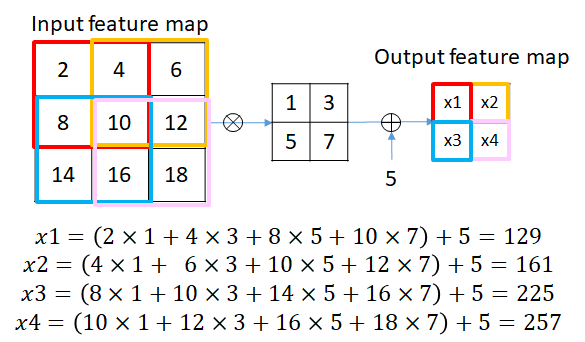

In [50]:
InputImage = torch.FloatTensor([[ 2, 4, 6],
                                [ 8,10,12],
                                [14,16,18]]).unsqueeze(axis=0).unsqueeze(axis=0)

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=2, stride=1)
replace_weight = torch.FloatTensor([[1,3],
                                    [5,7]]).unsqueeze(axis=0).unsqueeze(axis=0)
replace_bias = torch.tensor([5])
conv.weight.data=replace_weight
conv.bias.data=replace_bias
print('Input feature map:{}'.format(InputImage))
print('weight of conv.:{}'.format(conv.weight.data))
print('bias of conv.:{}'.format(conv.bias.data))
output = conv(InputImage)
print('Output feature map:{}'.format(output))


Input feature map:tensor([[[[ 2.,  4.,  6.],
          [ 8., 10., 12.],
          [14., 16., 18.]]]])
weight of conv.:tensor([[[[1., 3.],
          [5., 7.]]]])
bias of conv.:tensor([5])
Output feature map:tensor([[[[129., 161.],
          [225., 257.]]]], grad_fn=<ThnnConv2DBackward>)


Example 2: Conv.
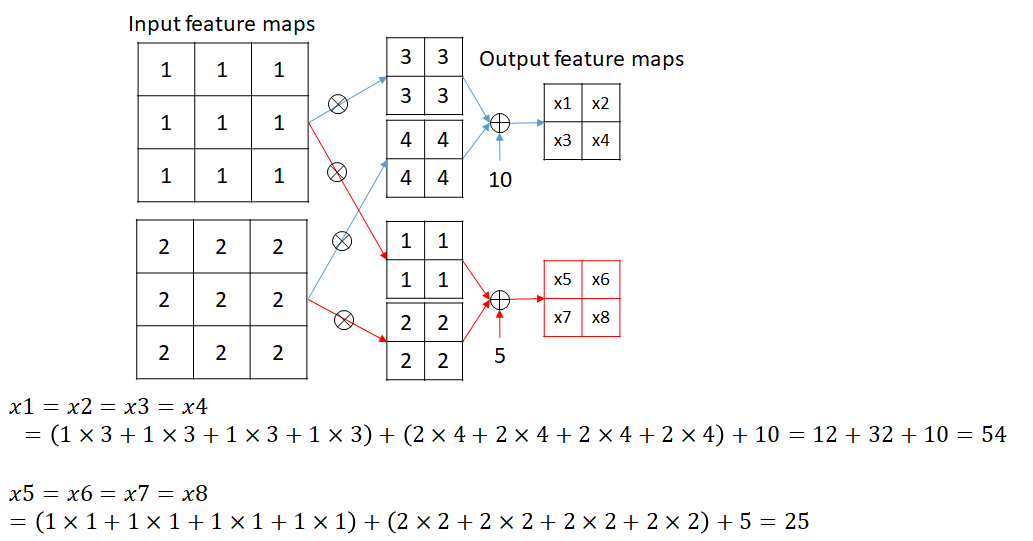

In [57]:
InputImage = torch.FloatTensor([
                                [[ 1,1,1],
                                 [ 1,1,1],
                                 [ 1,1,1]],
                                [[ 2,2,2],
                                 [ 2,2,2],
                                 [ 2,2,2]]
                                ]).unsqueeze(axis=0) # 1*2*3*3

conv = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=2, stride=1) # 2*2*2*2
replace_weight = torch.FloatTensor([
                                    [[[3,3],
                                     [3,3]],
                                    [[4,4],
                                     [4,4]]],
                                    [[[1,1],
                                     [1,1]],
                                    [[2,2],
                                     [2,2]]]
                                    ])
replace_bias = torch.tensor([10,5])
conv.weight.data=replace_weight
conv.bias.data=replace_bias
print('Input feature map:{}'.format(InputImage))
print('weight of conv.:{}'.format(conv.weight.data))
print('bias of conv.:{}'.format(conv.bias.data))
output = conv(InputImage)
print('Output feature map:{}'.format(output))

Input feature map:tensor([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],

         [[2., 2., 2.],
          [2., 2., 2.],
          [2., 2., 2.]]]])
weight of conv.:tensor([[[[3., 3.],
          [3., 3.]],

         [[4., 4.],
          [4., 4.]]],


        [[[1., 1.],
          [1., 1.]],

         [[2., 2.],
          [2., 2.]]]])
bias of conv.:tensor([10,  5])
Output feature map:tensor([[[[54., 54.],
          [54., 54.]],

         [[25., 25.],
          [25., 25.]]]], grad_fn=<ThnnConv2DBackward>)


----------------------------------
<font color=#0000FF size=3> **快速將權重改成某種分布**
</font>

In [13]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(3), stride=1)
print('weight of conv layer:\n{}'.format(conv.weight))
conv.weight.data.normal_(0,1)
print('*'*50)
print('weight of conv layer:\n{}'.format(conv.weight))

weight of conv layer:
Parameter containing:
tensor([[[[ 0.2152, -0.1962, -0.2651],
          [-0.0582, -0.2000,  0.0533],
          [-0.0094, -0.2791, -0.0262]]]], requires_grad=True)
**************************************************
weight of conv layer:
Parameter containing:
tensor([[[[ 0.3023, -0.1886, -0.6398],
          [ 1.6285,  1.2086,  0.6949],
          [ 0.2701,  0.5712,  1.3276]]]], requires_grad=True)


(array([19., 26., 21., 18., 13., 16., 20., 11., 22., 26., 18., 17., 24.,
        20., 10.,  9., 15., 24., 24., 15., 20., 21., 24., 24., 24., 21.,
        16., 27., 14., 22., 29., 21., 20., 23., 22., 14., 22., 21., 19.,
        22., 21., 25., 20., 24., 21., 18., 23., 10., 18., 26.]),
 array([-0.03161015, -0.03034988, -0.02908961, -0.02782933, -0.02656906,
        -0.02530878, -0.02404851, -0.02278823, -0.02152796, -0.02026769,
        -0.01900741, -0.01774714, -0.01648686, -0.01522659, -0.01396631,
        -0.01270604, -0.01144577, -0.01018549, -0.00892522, -0.00766494,
        -0.00640467, -0.0051444 , -0.00388412, -0.00262385, -0.00136357,
        -0.0001033 ,  0.00115698,  0.00241725,  0.00367752,  0.0049378 ,
         0.00619807,  0.00745835,  0.00871862,  0.0099789 ,  0.01123917,
         0.01249944,  0.01375972,  0.01501999,  0.01628027,  0.01754054,
         0.01880081,  0.02006109,  0.02132136,  0.02258164,  0.02384191,
         0.02510219,  0.02636246,  0.02762273,  0.02888301,

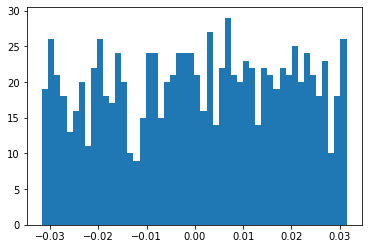

In [14]:

conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
data = conv.weight.data
data = data.numpy()
data = np.squeeze(data)
plt.hist(data,50)

(array([ 1.,  0.,  1.,  3.,  2.,  1.,  2.,  3.,  5.,  5., 11.,  6., 19.,
        21., 16., 21., 38., 34., 22., 27., 36., 45., 49., 53., 51., 55.,
        34., 57., 39., 46., 49., 38., 40., 28., 23., 31., 17., 18., 16.,
         8.,  7.,  8.,  1.,  5.,  3.,  1.,  1.,  2.,  0.,  1.]),
 array([-3.1090083 , -2.984487  , -2.8599658 , -2.7354445 , -2.6109233 ,
        -2.486402  , -2.361881  , -2.2373598 , -2.1128385 , -1.9883173 ,
        -1.863796  , -1.7392747 , -1.6147535 , -1.4902323 , -1.3657111 ,
        -1.2411898 , -1.1166686 , -0.9921474 , -0.86762613, -0.74310493,
        -0.6185837 , -0.49406245, -0.36954123, -0.24501999, -0.12049875,
         0.00402248,  0.1285437 ,  0.25306493,  0.3775862 ,  0.5021074 ,
         0.62662864,  0.7511499 ,  0.8756711 ,  1.0001923 ,  1.1247135 ,
         1.2492348 ,  1.373756  ,  1.4982773 ,  1.6227984 ,  1.7473197 ,
         1.871841  ,  1.9963622 ,  2.1208835 ,  2.2454047 ,  2.369926  ,
         2.4944472 ,  2.6189682 ,  2.7434895 ,  2.8680108 ,

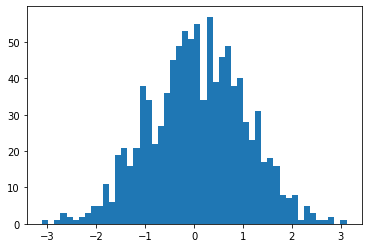

In [15]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
conv.weight.data.normal_(0,1)
data = conv.weight.data
data = data.numpy()
data = np.squeeze(data)
plt.hist(data,50)

<font color=#0000FF size=3> **那要用哪生成方式**
</font>
<font  size=3>
+ 1. 不用理他，用default就好 <br>
+ 2. Xavier系列: Xavier均匀分布、Xavier常態分布 <br>
+ 3. kaiming系列: kaiming均匀分布、kaiming常態分布 <br>
+ 4. 我要自己發明，但有哪些函數可以用

>Note:<br>
    - 參數初始化可以見torch.nn.init。 <br>
    - 均勻分布 = uniform distribution <br>
    - 常態分布 = normal distribution <br>
    去年課程有介紹過Xavier和kaiming的方法，有興趣知道為什麼要這樣設定的可以看我以前寫的文章[深度學習: Weight initialization和Batch Normalization](https://chih-sheng-huang821.medium.com/%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-weight-initialization%E5%92%8Cbatch-normalization-f264c4be37f5)
    </font>

In [16]:
def histforConv(conv):
    data = conv.weight.data
    data = torch.flatten(data)
    data = data.numpy()
    data = np.squeeze(data)
    plt.hist(data,50)
    plt.show()

### 1. 不用理他，用default就好 <br>
Default用什麼生成，我們來看一下他的生成方式。

default是用均勻分布
$$U(-stdv, stdv)$$
stdv為
$$
stdv = \frac{1}{\sqrt{x}}
$$
x=(output channel個數*kernel sizse)

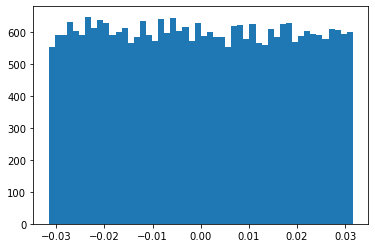

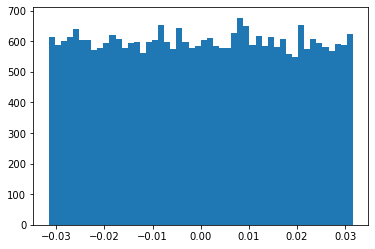

In [17]:
import math
conv = nn.Conv2d(in_channels=10, out_channels=30, kernel_size=(10,10), stride=1)
histforConv(conv)

stdv = 1. / math.sqrt(conv.weight.size(1)*conv.weight.size(2)*conv.weight.size(3))
conv.weight.data.uniform_(-stdv, stdv)
histforConv(conv)


### 2. Xavier系列: Xavier均匀分布、Xavier常態分布

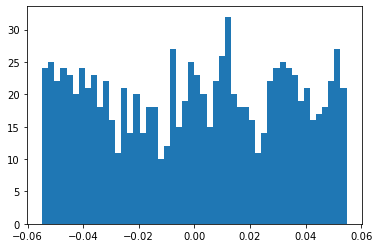

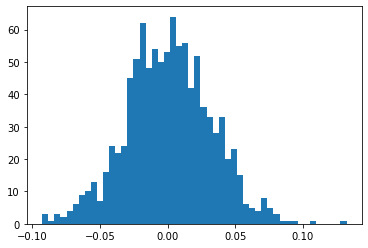

In [18]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.xavier_uniform_(conv.weight)
histforConv(conv)

nn.init.xavier_normal_(conv.weight)
histforConv(conv)

也靠參數(gain)設定可以調整分布的範圍

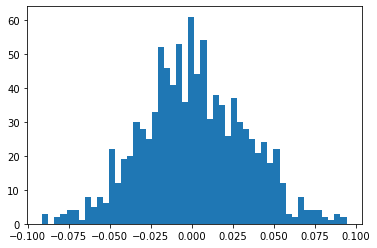

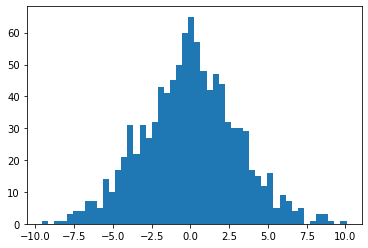

In [19]:
nn.init.xavier_normal_(conv.weight)
histforConv(conv)
nn.init.xavier_normal_(conv.weight, gain=100)
histforConv(conv)

### 3. kaiming系列: kaiming均匀分布、kaiming常態分布 <br>

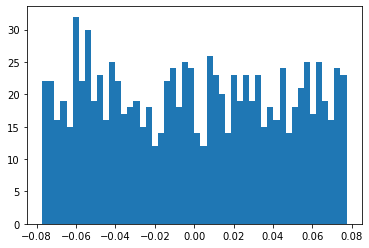

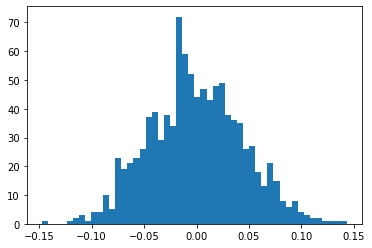

In [20]:
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.kaiming_uniform_(conv.weight)
histforConv(conv)

nn.init.kaiming_normal_(conv.weight)
histforConv(conv)

### 4. 我要自己發明，但有哪些函數可以用<br>

Reference: [TORCH.NN.INIT](https://pytorch.org/docs/stable/nn.init.html?highlight=nn%20init%20sparse_#torch.nn.init.sparse_)

----------------
1. 均勻分布，參數服從均勻分布a到b之間: <br>
$$
U(a,b)
$$
<code>torch.nn.init.uniform_(tensor, a=0, b=1)</code>

----------------    
2. 常態分布，參數服從常態分布，default為平均數0 標準差1: <br>
$$
N(mean,std)
$$
<code>torch.nn.init.normal_(tensor, mean=0, std=1)</code>  

----------------    
3. 設定為常數 <br>
<code>torch.nn.init.constant_(tensor, val)</code>

----------------
4. 單位化矩陣設定 <br>
<code>torch.nn.init.eye_(tensor)</code>

----------------
5. 正交 <br>
讓生成的權重之間會正交。（必須至少是2維的，對於更高維度的張量，超出的維度會被展平，視作行等於第一個維度。<br>
<code>torch.nn.init.orthogonal_(tensor, gain=1)</code>

----------------
6. sparsity <br>
讓參數生成的時候會稀疏化。
參數sparsity設定為每一列要設定為0的比例。<br>
其他非0的參數生成採用$N(0, std)$，預設std=0.01。<br>
<code>torch.nn.init.sparse_(tensor, sparsity, std=0.01)</code>

----------------

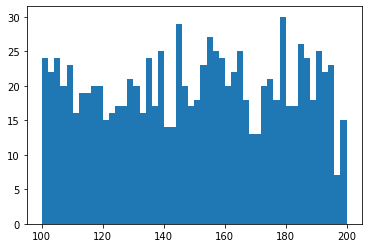

In [21]:
# 1. 均勻分布，參數服從均勻分布a到b之間
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.uniform_(conv.weight,a=100, b=200)
histforConv(conv)

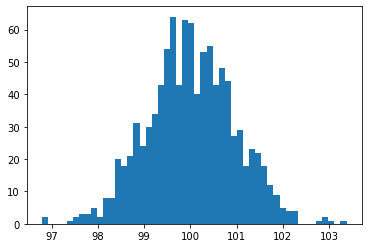

In [22]:
# 2. 常態分布，參數服從常態分布，default為平均數0 標準差1
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(1000,1), stride=1)
nn.init.normal_(conv.weight,mean=100, std=1)
histforConv(conv)

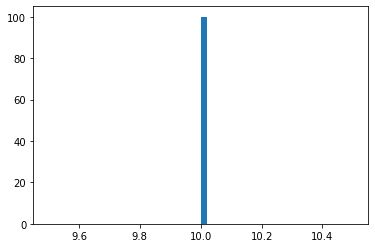

In [23]:
# 3. 設定為常數
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(100,1), stride=1)
nn.init.constant_(conv.weight,val=10)
histforConv(conv)

In [24]:
# 4. 單位化矩陣設定
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(5,5), stride=1)
nn.init.eye_(conv.weight.data[0,0,:,:])
print('weight of conv layer:\n{}'.format(conv.weight))

weight of conv layer:
Parameter containing:
tensor([[[[1., 0., 0., 0., 0.],
          [0., 1., 0., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.],
          [0., 0., 0., 0., 1.]]]], requires_grad=True)


In [25]:
# 5. 正交 
conv = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=(2,1), stride=1)
nn.init.orthogonal_(conv.weight)
print('weight of conv layer:\n{}'.format(conv.weight))

data = conv.weight.data
print(data.shape)
data = data.numpy()[:,0,:,0]
print(np.dot(data,np.transpose(data)))


conv = nn.Conv2d(in_channels=10, out_channels=4, kernel_size=(1,1), stride=1)
nn.init.orthogonal_(conv.weight)
data = conv.weight.data
print(data.shape)
data = data.numpy()[:,:,0,0]
print(np.dot(data,np.transpose(data)))


weight of conv layer:
Parameter containing:
tensor([[[[-0.9499],
          [-0.3125]]],


        [[[-0.3125],
          [ 0.9499]]]], requires_grad=True)
torch.Size([2, 1, 2, 1])
[[ 9.9999976e-01 -3.7126032e-08]
 [-3.7126032e-08  1.0000000e+00]]
torch.Size([4, 10, 1, 1])
[[ 9.9999982e-01  9.7125934e-09  1.2959491e-08  5.8572944e-08]
 [ 9.7125934e-09  1.0000002e+00  2.7926085e-08  8.2160987e-08]
 [ 1.2959491e-08  2.7926085e-08  9.9999964e-01 -8.4383025e-08]
 [ 5.8572944e-08  8.2160987e-08 -8.4383025e-08  1.0000001e+00]]


In [26]:
# 6. sparsity 
conv = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=(5,5), stride=1)
nn.init.sparse_(conv.weight.data[0,0,:,:], sparsity=0.5, std=1)
print('weight of conv layer:\n{}'.format(conv.weight))

weight of conv layer:
Parameter containing:
tensor([[[[-2.6159,  3.8741,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -0.8282, -0.7872,  0.0000],
          [-0.3861,  0.0000,  0.0000,  0.0000, -0.3773],
          [ 0.0000,  0.1464,  0.0000,  0.5064,  1.0407],
          [ 0.0000,  0.0000,  0.5676,  0.0000,  0.0000]]]], requires_grad=True)
